#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020


# Spotlight:  MovieLens Dataset and Data Visualization by Seaborn

#### Abstract
The first step in every Information Retrieval and Processing problem is to visualize the data. At the final step of researches, i.e submitting papers, researchers usually explain their ideas with the aid of data visualization, because human's vision may have a better acceptance to figures than words or equations. 
<br/><br/>MovieLens was created in 1997 by GroupLens Research, University of Minnesota, which was also introduced in Professor Cavelee's Information Retrieval course. GroupLens Research group provided [dataset](https://grouplens.org/datasets/movielens/) for researches on personalized recommendations.
<br/><br/>In this spotlight, it will start by data processing procedures of MovieLens dataset, as the elaboration of seaborn usage. Secondly, seaborn will be used to present the relationship between data by **sns.relplot** method. Thirdly, seaborn will illustrate the reationship of categorical data with the aid of **sns.catplot** method and its multiple useful functions. Finally, by introducing **sns.displot**, **sns.jointplot** and **sns.pairplot**, we could have a clear picture on the properties of this dataset.


## MovieLens Latest Datasets: recommended for education and development

Since the spotlight will adopt MovieLens dataset: ml-latest-small  to introduce the functions and methods of **seaborn**, the spotlight attaches the citation to fulfill the expectation of researchers from GroupLens Research group.

**Citation**
<br/>The description of the dataset [ml-latest-small](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)
<br/>F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

# Part 1: Dataset Descriptions and Data Processing

First, this movie dataset collects the latest movies and their rating results, which will change over time. The last update was at September 2018, which contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users.

The URL of dataset [ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip)


In [2]:
import numpy as np
import pandas as pd

ratings_data = pd.read_csv("ratings.csv")
movie_names = pd.read_csv("movies.csv")
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


**ratings.csv**: the ratings data files contain features such as userId, **movieId**, rating,timestamp.
<br/>**movies.csv**: the movies data files contain features such as **movieId**, title, genres.
<br/>We could notice that the **movieId** is the common feature of these two data files. Therefore, we merge these two data by movieId, then we could have a rough picture of interpreting this data: users provided their own ratings on specific movies at a given timestamp.
<br/>In the next part, this spotlight will generate some added features and explain further details on these features.

In [0]:
from datetime import date
# Fair: rating >= 3.0 (Add a new feature fair)
fair = movie_data['rating'] >= 3.0
movie_data['Fair'] = fair

# Transform timestamp to the Rated Year of specific movie by specific user
timestamp = pd.to_datetime(movie_data['timestamp'], unit='s')
movie_data['RatedYear'] = timestamp.dt.year

# Catogorize by Decades: 1996~1999 to 0, 2000~2009 to 1, 2010~2018 to 2
movie_data['Decades'] = movie_data['RatedYear'].apply(lambda x: 0 if x <= 1999 else (1 if x <= 2009 else 2))

movie_data.head(n=10)

,userId,movieId,rating,timestamp,title,genres,Fair,RatedYear,Decades,ReleasedYear
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2000,1,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1996,0,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2005,1,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,2017,2,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2011,2,1995
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2016,2,1995
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2000,1,1995
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2014,2,1995
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,2000,1,1995
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,1996,0,1995


The row information is ordered firstly by userId, then, by movieId within userId.
<br/>**user_id** - the ID of the user who rated the movie.
<br/>**item_id** - the ID of the movie.
<br/>**rating** - The rating the user gave the movie, between [0.5, 5], with half-star ratings (ex: 2.5, 4.5).
<br/>**timestamp** - The time the movie was rated, represented by seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970, and it is transformed and truncated to **RatedYear** later.
<br/>**title** - The title of the movie.
<br/><br/>[[*Added Features*]]: For these features, their initials will start with capital letters.
<br/>**Fair** - The rating is greater than or equal to 3.0 or not.
<br/>**RatedYear** - Transforming the timestamp data to date_time, then truncating the date to be year only.
<br/>**Decades** - Splitting the RatedYear into 3 decades (decade 0: 1996-1999, decade 1: 2000-2009, decade 2: 2010-2018).

In [0]:
# Ranking by the average rating of each movie
movieratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

# Total number of ratings
movieratings_mean_count['Num_Of_Ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
movieratings_mean_count['movieId'] = pd.DataFrame(movie_data.groupby('title')['movieId'].sum())

To explore the further details of this dataset, this spotlight implements some data processing steps.
<br/>(1) Calculate the mean rating by title of movies.
<br/>(2) Calculate the total num_of_ratings by title of movies.
<br/>(3) Add the movideId as a reference.
<br/>Finally, we will have a relational dataset **movieratings_mean_count**.

In [0]:
# Sorting by the ratings
movieratings_mean_count.sort_values("rating", inplace = True, ascending = False) 
movieratings_mean_count.head(n=5)

,rating,Num_Of_Ratings,movieId
title,,,
Gena the Crocodile (1969),5.0,1,175293
True Stories (1986),5.0,1,7815
Cosmic Scrat-tastrophe (2015),5.0,1,146684
Love and Pigeons (1985),5.0,1,130978
Red Sorghum (Hong gao liang) (1987),5.0,1,2972


In [0]:
# Sorting by the number of ratings
movieratings_mean_count.sort_values("Num_Of_Ratings", inplace = True, ascending = False) 
movieratings_mean_count.head(n=5)

,rating,Num_Of_Ratings,movieId
title,,,
Forrest Gump (1994),4.164134,329,117124
"Shawshank Redemption, The (1994)",4.429022,317,100806
Pulp Fiction (1994),4.197068,307,90872
"Silence of the Lambs, The (1991)",4.161290,279,165447
"Matrix, The (1999)",4.192446,278,714738


We can do some rankings on our data by **Num_Of_Ratings** and **rating**. 
Noted that **rating** is the mean rating for a movie.
<br/>(1) Ranking by rating: we can find that some movies are not that popular 
or authoritative, because there is only one user and give them the highest rating (5.0)
<br/>(2) Ranking by Num_Of_Ratings: we can find some popular movies, and these movies are with acceptable ratings.

In [0]:
rating_year = pd.DataFrame(movie_data.groupby('RatedYear')['rating'].mean())
rating_year['Num_Of_Ratings'] = pd.DataFrame(movie_data.groupby('RatedYear')['rating'].count())
rating_year.head(n=5)

,rating,Num_Of_Ratings
RatedYear,,
1996,3.535927,6040
1997,3.727557,1916
1998,3.435897,507
1999,3.772448,2439
2000,3.392506,10061


We can also do some analysis on the bias of dataset. For instance, we can group the data by RatedYear, and calculate the mean_rating and Num_Of_Ratings of each year.

#### Observations

In this part, the spotlight implements some simple processing to the dataset ml-latest-small, and added some features including **Fair**, **RatedYear**, **Decades**.
<br/>Secondly, it also provided a opaque concept: the number of ratings is more important than the mean rating. And this concept will be further supported by seaborn from Part 2 to Part 4.
<br/>Furthermore, more methods in the seaborn will be introduced based on the dataset ml-latest-small in the following parts.


# Part 2: sns.relplot - presenting the relationship between data

sns.relplot is the simple method in seaborn, it can represent the data on the Cartesian coordinate system. The most simplist method call is:
<br/>**sns.relplot(x="X", y="Y", data=DATA)**
<br/>where:
* **X, Y**: names of variables in DATA
* **DATA**: shall be a dataDataFrame. We have generated several examples in Part 1.

There are also some optional parameters that will be covered in Part 2:
* **hue**: a color variable in order to represent different data properties on (x,y) Cartesian coordinate system.
* **style**: provide different styles for data in different properties, i.e: the different shapes or forms.
* **aspect**: control the width of the plot. 

In the following example, the spotlight will analyze the data by sns.relplot method.
<br/>Further information of [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)


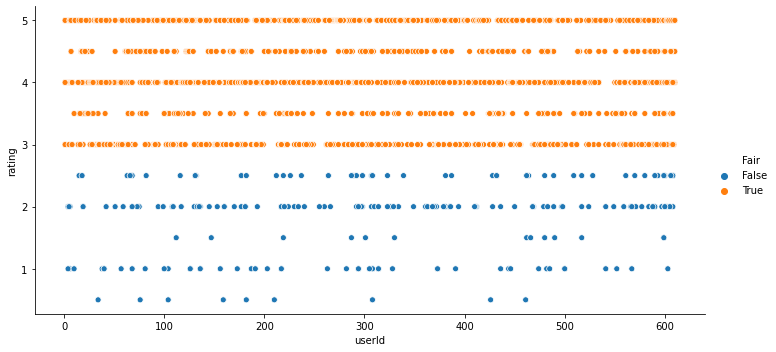

In [0]:
import seaborn as sns
# Total number of data: 9743, pick 20% for graph
partial_movie_data = movie_data.head(n=2440)
sns.relplot(x="userId", y="rating", hue="Fair", aspect=2, data=partial_movie_data)

In Part 1, we observed that the number of ratings is a better indicator for movie recommendation, because we conjecture that people tend to watch good movies and give positive evaluations to the movie they rate.
<br/> This result supports the support because we split the rating [0.5, 5] by half, for rating >= 3.0 is Fair and non-fair for other cases. Rating 3.0 is the median of the rating, and we observe that users tend to give ratings higher than 3.0.
<br/><br/> In this section, we introduce **hue** parameter to implement on the **Fair** feature. Thus, human eyes could clearly differentiate the **Fair (orange)** data points and the **non-Fair (blue)** data points.
<br/> From the sns.relplot result above, the distribution density of Fair (rating >= 3.0) is much more higher than non-Faie (rating < 3.0).
<br/> Because in this experiment of building this dataset, users can choose the movie they interested to do ratings.  In other words, we can conclude that the **number of ratings** is a more solid indicator than **average rating** of a movie.


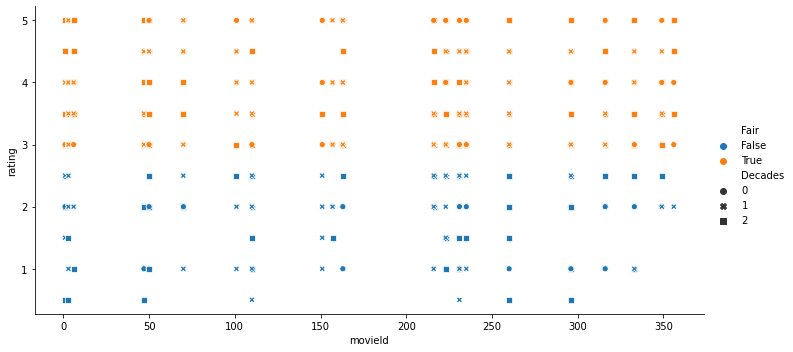

In [0]:
sns.relplot(x="movieId", y="rating", hue="Fair", style="Decades", aspect=2, data=partial_movie_data)

In this section, we introduce the **style** parameter appended to the sns.relplot figure in the previous section. In part 1, we already split the RatedYear into 3 decades (decade **0**: 1996-1999, decade **1**: 2000-2009, decade **2**: 2010-2018).
<br/>In this way, we not only have the **Fair/Non-Fair** classifications but also the **Rated Decades** categories.
<br/>Even though the method of spliting Rated Year is not even and this spliting mechanism is not fair to recent movies, we could still have some findings through the sns.relplot results.
<br/><br/>Take movieId1, Toy Story (1995), as an example, the plot show that it is a classic and popular movie, not only because of its huge number of ratings but also its ratings in recent years. While it was released in 1995, it still received ratings during decade 2 (2010-2018).
<br/>Simultaneously, its ratings in decade 2 are polarized, that is to say, it only received high ratings (>= 4.0) or low ratings (<= 1.5). We can also explain that for some recent viewers in this decade, the Toy Story(1995) is a classic good movie, but for some recent viewers, they may think the image quality of 1995 technology is not acceptable for them, or the plot at 95's era is boring for them.

In [3]:
movie_data.head(n=5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# <br/>Part 3: sns.catplot - Illustrating the Reationship of Categorical Data

<br/>**sns.catplot** is the essential method in seaborn, since it combines more sub-methods that help us analyze the data further by more delicated graphes. The most simplist method call is:
<br/>**sns.catplot(x="X", y="Y", data=DATA)**
<br/>where:
* **X, Y**: names of variables in DATA
* **DATA**: shall be a dataDataFrame. We have generated several examples in Part 1.
* **kind**: an optional parameter with default value **kind='strip'**. By tuning this parameter, users can have select different kinds of plot and implement different kinds of analysis.

There are also some optional parameters that will be covered in Part 3:
* **aspect**: control the width of the plot. 
In the following example, the spotlight will analyze the data by sns.relplot method.
* **hue**: a color variable in order to represent different data properties on (x,y) Cartesian coordinate system.
* **markers**: When a hue is given, users can assign different markers for data points beloning to different hues. For instance, when a hue is set by a feature with 3 different values, users can set markers=
["^", "o", "*"].
* **linestyles**: In catplot, line is used to connect the adjacent data points, and the slopes of these lines are also an essential indicator for analysis. This parameter can be set if the parameter hue is given. For instance, hen a hue is set by a feature with 3 different values, users can set linestyles=["solid", "dotted", "dashed"]
<br/><br/>Further information of 
[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)


### **A: Classified Scatter Plot: strip/swarm mode under catplot**
**sns.catplot** supports two modes of method (**kind** parameter), and the pros and cons of these two modes will be illustrated by the movie data we arranged in part 1.

<Figure size 1440x360 with 0 Axes>

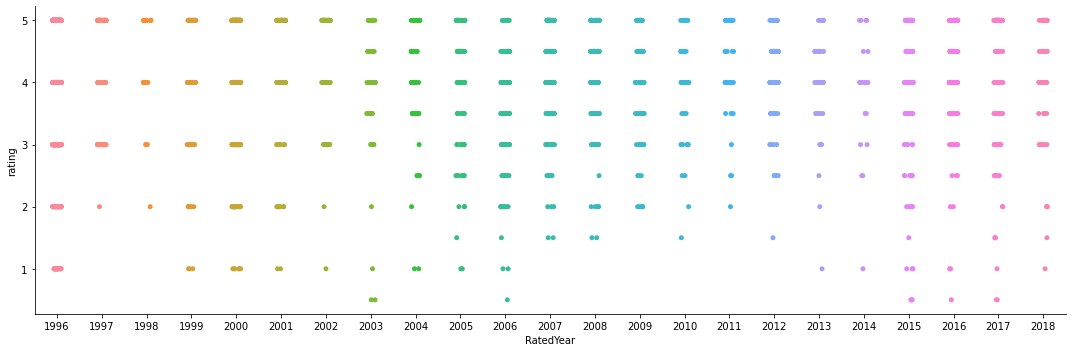

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.catplot(x="RatedYear", y="rating", aspect=3, data=partial_movie_data)

**sns.catplot** presents the relationship of y-axis with respect to different x-axis categories by plots similar to scatter plots. 
<br>However, the default mode of catplot is stripplot, so many data points with the same value will be presented as overlapping points. This may be a disadvantage since we cannot differentiate the intensity difference on specific rating between different years.
<br>For instance, most years have great amount of rating-4.0's, and there still exists some intensity differences. But we cannot see it from default mode of catplot (**kind='strip'**), since they are all with the same length.

<br>More descriptions of 
[stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)


<Figure size 1440x360 with 0 Axes>

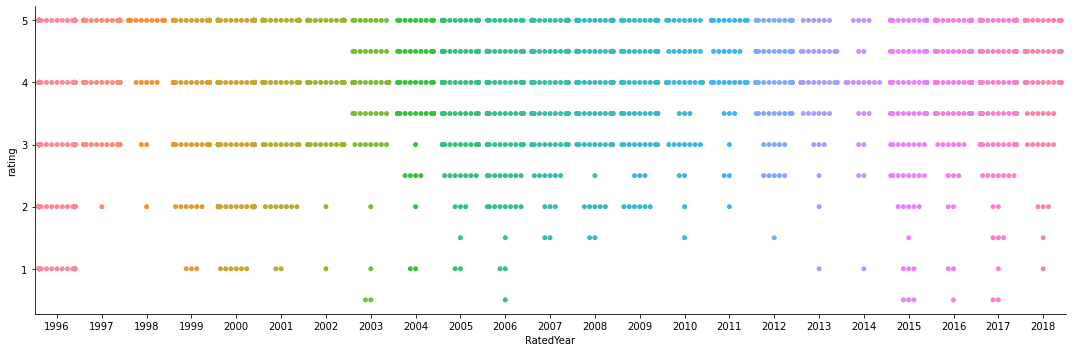

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.catplot(x="RatedYear", y="rating", aspect=3, kind='swarm', data=partial_movie_data)

Just as mentioned in the previous section, when there are a large amount of same observed-value or similar observed-value, the data points will overlap and provide inaccurate presentation, when we hope to observe the distribution of data.
<br>In this section, the spotlight adopts **kind="swarm"** to prevent the overlapping of scattered points, and it is better for us to recognize the intensity difference between different years.
<br>As a tradeoff, "**swarm**" mode requires a much larger space to represent the data distribution. Therefore, the spotlight introduce an appropriate **aspect** parameter to control the horizontal width for this graph. Moreover, the time complexity under this mode is extermely high when compared to the default strip mode, which is unfriendy for presenting a large amount of scattering data.
<br>P.S: Since swarm mode is so inappropriate for presenting large dataset, this spotlight only picks the nearly top 25% of movie_data to become **partial_movie_data** when building the swarm-mode sns.catplot plot.

###<br> **B: Classified Distribution Plot: box/boxen mode under catplot**
Just as mentioned previously, when the input data size is large, Classified Scatter Plots may be hard for analyzing the data. (time complexity or the information is huge for human eyes)
<br>With the aid of statistics concepts including first/second/third Quartiles (the 2nd quartile usually called median) and some extremums, we can gather the data into plots with a better understanding. Thus, the spotlight will introduct the box/boxen mode of catplot.


<Figure size 1440x360 with 0 Axes>

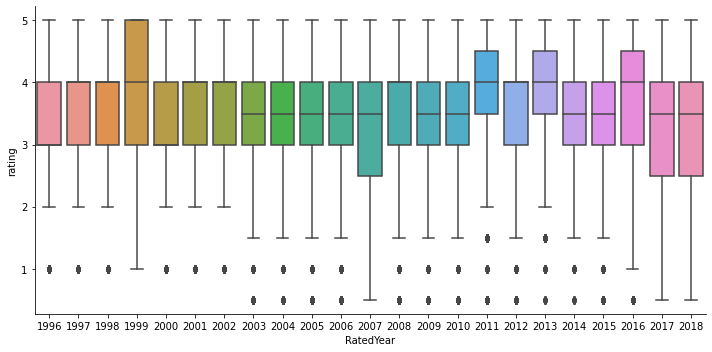

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.catplot(x="RatedYear", y="rating", aspect=2, kind='box', data=movie_data)

The box-based catplot is a basic plot for presenting classified distributions. It introduce first/second/third Quartiles (the 2nd quartile usually called median) and some extremums to count the distribution of data (representing by width). However, the visual drawback here is the extremums are represented by dots, which is a kind of emphasizing. Thus, maybe a plot of representing actual amount by intensity is a better choice, which is boxen plot.

<Figure size 1440x360 with 0 Axes>

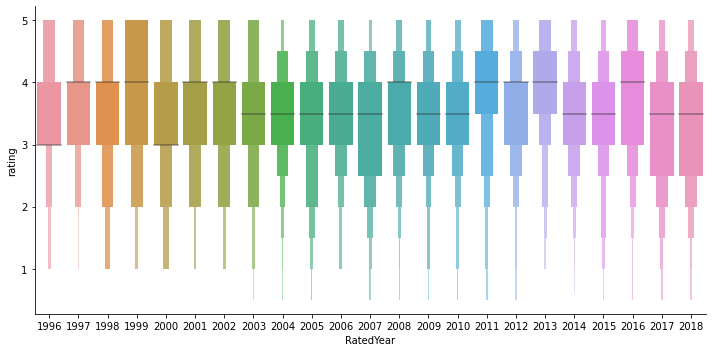

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.catplot(x="RatedYear", y="rating", aspect=2, kind='boxen', data=movie_data)

The boxen-based catplot is an advanced plot for presenting classified distributions. It introduces more intervals to count the distribution of data (representing by width), which is more useful when analyzing on huge data because there are more information as reference.
<br><br>The differences between box-based and boxen-based catplot is that the intensity of extremums (rating 0.5 in 1997 & 1998) have no differences in boxplot, but we can observe the intensity differences in the boxenplot.
<br>Besides, the boxplot utilizes dot to represent extremes, which may highlight these outliers. On the other hand, boxenplot utilizes the intensity in width to represent the amount of this rating on specific Rated Year.
<br><br>
### **C: Classified Statistic Estimations: point mode under catplot**
In the previous section, we realize the benefits of introducing the statistic concepts. In this part, the spotlight will introduce the pointplots: using a point and a Confidence Interval (CI) to represent the distribution relationship on y-axis with respect to x-axis.
<br>In the Part 1, we calculated the mean_rating and Num_Of_Ratings on each RatedYear, and we receive a long columns of numbers, and the **pointplot** (catplot with point-mode) can help us represent the data distribution in a praphic way. Also, by introducing the **countplot** (catplot with count-mode), we can have a clear picture on the amount of specific categories. 

In [0]:
rating_year

,rating,Num_Of_Ratings
RatedYear,,
1996,3.535927,6040
1997,3.727557,1916
1998,3.435897,507
1999,3.772448,2439
2000,3.392506,10061
2001,3.512239,3922
2002,3.606958,3478
2003,3.499377,4014
2004,3.506099,3279


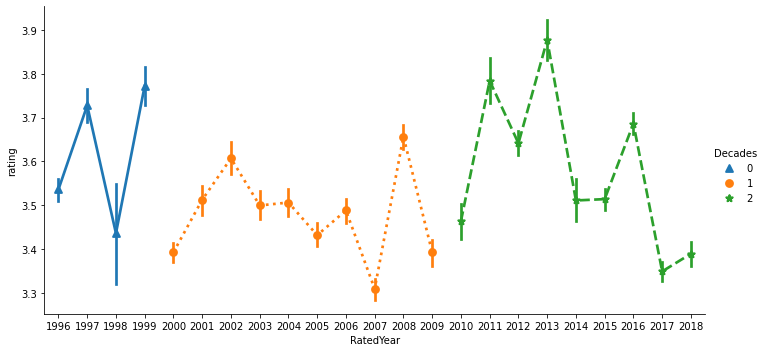

In [0]:
sns.catplot(x="RatedYear", y="rating", hue="Decades", 
			      kind="point", aspect = 2, 
            markers=["^", "o", "*"], linestyles=["solid", "dotted", "dashed"],
			      data=movie_data)

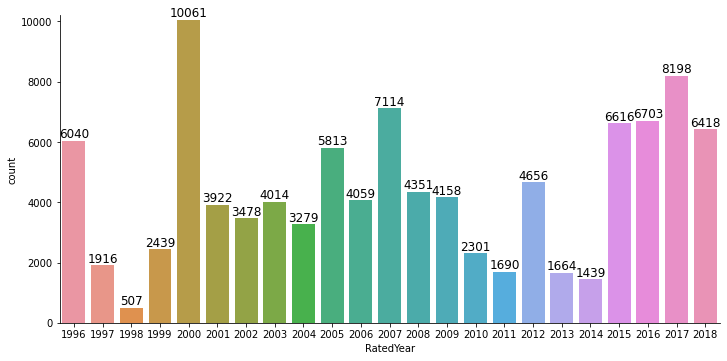

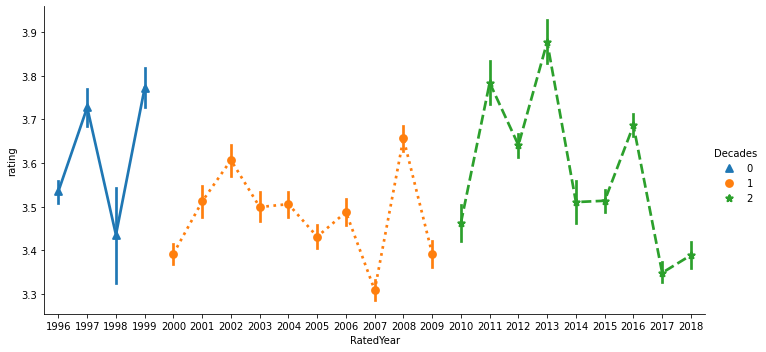

In [0]:
import matplotlib.pyplot as plt
import math

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

sns.catplot(x="RatedYear", kind="count", aspect = 2, data=movie_data)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = movie_data['RatedYear'].value_counts().max()  # ylim max value to be set
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()
# Reference: Add data labels to Seaborn factor plot
# https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
sns.catplot(x="RatedYear", y="rating", hue="Decades", 
			      kind="point", aspect = 2, 
            markers=["^", "o", "*"], linestyles=["solid", "dotted", "dashed"],
			      data=movie_data)

Combining the information from both the **countplot** of Num_Of_Ratings and the **pointplot** of mean_rating in different RatedYear, we could find that the value of mean_rating is not solid enough. Since the years with high average rating (EX: 1999 & 2010), the Num_Of_Ratings is much smaller than the other years, which make the data from these year is biased and unstable because an exterme rating may change the overall mean_rating result obviously.
<br>Moreover, by introducing the **matplotlib.pyplot** library in this section, we can have a much thorough analysis on recognizing the data. For the presentation above, the spotlight added the count values on the plot. In this way, we can do the quantitative analysis on the graph, or we can explain the quantitative data by graph, which is a mutually beneficial analysis on the input data.

### Discussion
In this part of Spotlight, we can found there are some rating bias between raters from different years. By this information, designers can adopt some tunings on these bias to make the recommendation more accurately.

# **Part 4: sns.displot/jointplot/pairplot - Plotting the distribution of Data**

In this part, three methods will be introduced. They are displot, jointplot and pairplot.


###<br/> **A: Classified Scatter Plot: displot**
**sns.distplot** is a method in seaborn, in order to plot the one-dimensional distribution of a data. The common method call is:
<br/>**sns.distplot(x="X", kde=KDE, bins=BINS)**
<br/>where:
* **X**: names of variable in DATA to show on displot.
* **KDE**: an optional True/False parameter, the default value is TRUE, to show the gaussian kernel density estimate of input data. This spotlight selects it to be false, because it focus more on the quantitative values of data X.
* **BINS**: decide the number of bin. Give it a larger value could receive a more accurate results. 
<br/><br/>Further information of 
[seaborn.displot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [0]:
movieratings_mean_count.head(n=5)

,rating,Num_Of_Ratings,movieId
title,,,
Forrest Gump (1994),4.164134,329,117124
"Shawshank Redemption, The (1994)",4.429022,317,100806
Pulp Fiction (1994),4.197068,307,90872
"Silence of the Lambs, The (1991)",4.161290,279,165447
"Matrix, The (1999)",4.192446,278,714738


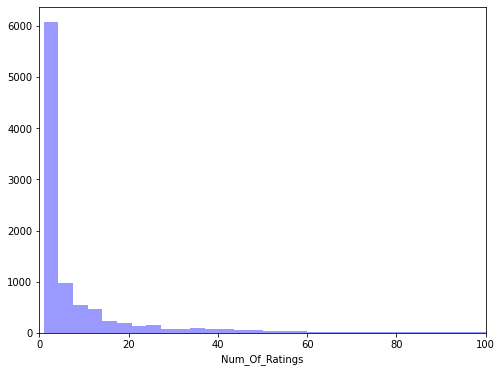

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.xlim([0,100])
x = movieratings_mean_count["Num_Of_Ratings"]
sns.distplot(x, kde=False, bins=100, color="blue")

With the aid of sns.distplot, we can plot the histogram of the data (**Num_Of_Ratings** of MovieLens dataset). In this part, the spotlight sets **kde** to be false, since we care more on the real number of ratings rather than the percentage of the Gussian distribution of this data.
<br/>When we observe further on the output results, we can find that most of movies in dataset received less than 40 ratings. Most movies received few feedbacks from users so the mean_rating on these movie may not be solid enough for recommending as a good movie.



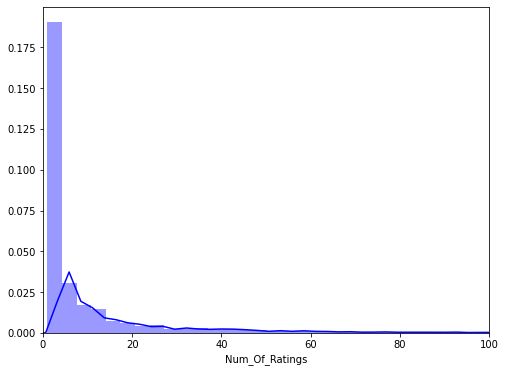

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.xlim([0,100])
x = movieratings_mean_count["Num_Of_Ratings"]
sns.distplot(x, kde=True, bins=100, color="blue")

When setting **kde=True** (default), the plot provides the KDE(Kernel Density Estimation) for this data, predicting the data under a Gussian distribution. However, since the number of Ratings accumulated in low frequencies, it is not useful to adopt this default parameter. Therefore, the spotlight set kde to be false in the previous part.

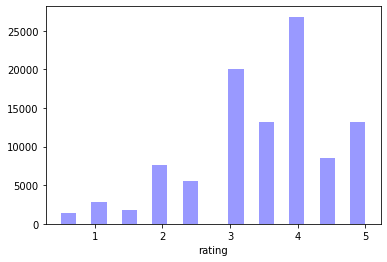

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
x = movie_data['rating']
sns.distplot(x, kde=False, bins=20, color="blue")

This plot is the distribution of ratings from users. There are two simple guess the spotlight would like to raise here.
(1) Users tend to give above-average ratings if they watched a movie and do the rating(average rating is between 2.5 and 3.0). The mean and median may located at aroung 3.5 support this guess.
<br/> (2) Users tend to give more integer ratings (1.0, 2.0, 3.0, 4.0, 5.0) and less floating-point ratings.

###<br/> **B: Classified Scatter Plot: jointplot**
**sns.jointplot** is a method in seaborn that we could observe the distribution of two-dimensional data. The most simplist method call is:
<br/>**sns.jointplot(x="X", y="Y", data=DATA )**
<br/>where:
* **X, Y**: names of two variables in DATA to show on displot.
* **DATA**: shall be a dataDataFrame. We have generated several examples in Part 1.
https://seaborn.pydata.org/generated/seaborn.jointplot.html




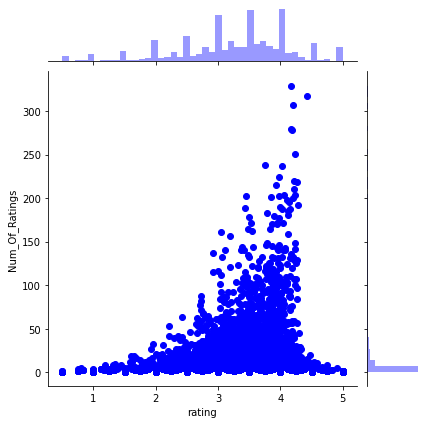

In [0]:
sns.jointplot(x='rating', y='Num_Of_Ratings', data=movieratings_mean_count, color="blue")

Either in the previous parts and Prof. Cav's class, there's a lesson-learn that the number of ratings is a much crucial indicator for good movie recommendations. <br/>That is to say, when a movie is with a great amount of ratings, it is guaranteed to be a great movie (at least an above-averaged good movie), supposing that raters are  free to select the movies they want and do ratings.
<br/>In the MovieLens dataset, the raters are with such property above, so we could plot a jointplot result based on **rating** and **Num_of_Ratings** for all movies and support the lesson-learn above.

###<br/> **C: Classified Scatter Plot: pairplot**
After going through all basic types of methods in seaboen, the spotlight will be closed by introducing **sns.pairplot**. When designers are given a data with multiple features and the designers may not have enough knowledge to select critical features for later analysis, the  **sns.pairplot** may be helpful to their works.
<br/>**sns.pairplot** works as below: Pick all featues in the input dataDataFrame, and draw the joinplot by all feature pairs. Then the designers could quickly recognize the highly positive/negative related feature-pair and have a better and quick understanding.

<br/>The basic method call is:
<br/>**sns.pairplot(DATA )**
<br/>where:
* **DATA**: shall be a dataDataFrame. We have generated several examples in Part 1.
https://seaborn.pydata.org/generated/seaborn.jointplot.html



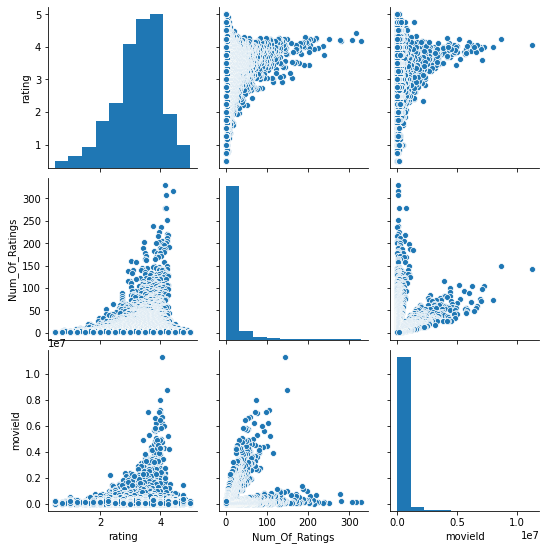

In [0]:
sns.pairplot(movieratings_mean_count)

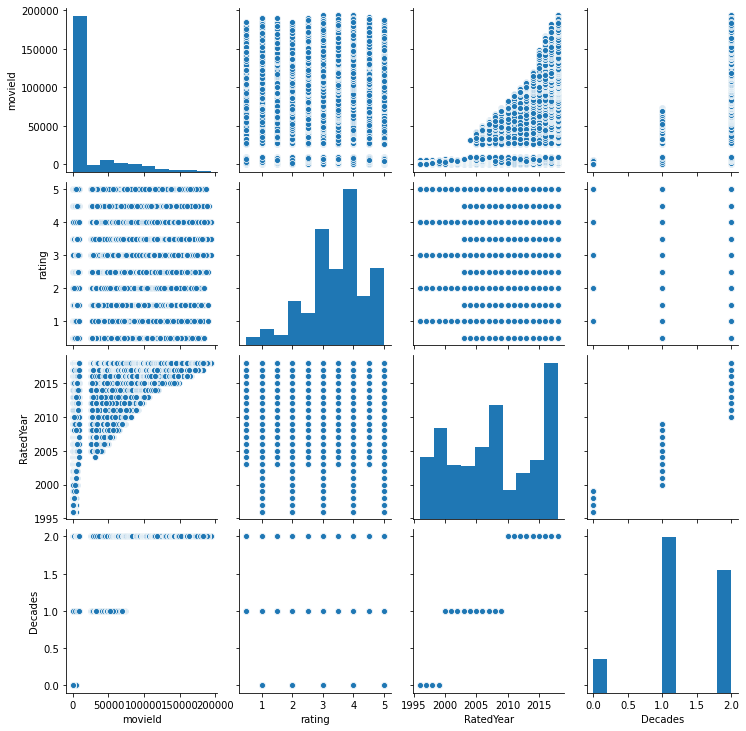

In [0]:
movie_data_for_pairplot = movie_data
# Remove the original timestamp, since RatedYear is easier for understanding
movie_data_for_pairplot = movie_data_for_pairplot.drop(columns=['timestamp'])
# Remove the other non-quantitative features.
movie_data_for_pairplot = movie_data_for_pairplot.drop(columns=['genres'])
movie_data_for_pairplot = movie_data_for_pairplot.drop(columns=['title'])
movie_data_for_pairplot = movie_data_for_pairplot.drop(columns=['Fair'])
movie_data_for_pairplot = movie_data_for_pairplot.drop(columns=['userId'])
sns.pairplot(movie_data_for_pairplot)

Pairplot is a useful method when the designers just receive their data and have no idea. Because this method will implement Brute Force searches on all feature pairs, which help the designers to make choices.